In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read

In [114]:
data = pd.read_table('places.txt', header=None, delimiter=',')
data.shape

(300, 2)

In [159]:
test = pd.read_table('test.txt', header=None, delimiter=',')
test

,0,1
0,-112.074866,33.470116
1,-80.525690,43.477099
2,-80.526641,43.485875
3,-80.846495,35.225825
4,-112.074428,33.448491
5,-112.073101,33.429907
6,-80.839636,35.227054


## Kmeans

In [115]:
def init(data, k):
    # set k points by sampling from data
    return data.sample(k)

In [137]:
def kmeans(train, k, steps = 100):
    # get k clusterings
    data = train.copy()
    
    # get initial points
    clusters = init(data, k)
    
    # iterate steps
    for idx in np.arange(steps):
        # calculate distance
        D2_list = []
        for i in np.arange(k):
            D2 = np.sum(np.subtract(data.iloc[:,:2],np.array(clusters.iloc[i]))**2,1)
            D2_list.append(D2)
        D2 = pd.concat(D2_list, axis=1)

        # get labels for each data points
        labels = np.argmin(np.array(D2), 1)
        data['label']=labels

        # recalculate clusters
        clusters = data.groupby('label').mean()
        # for every 10 steps plot
        if idx %10 ==0:
            print(clusters)
            plt.scatter(data[0], data[1], c=data.label)
            plt.scatter(clusters[0], clusters[1], c=clusters.index)
            plt.show()
        
    return data, clusters

               0          1
label                      
0     -99.581705  34.160279
1     -80.525690  43.477099
2     -80.526641  43.485875


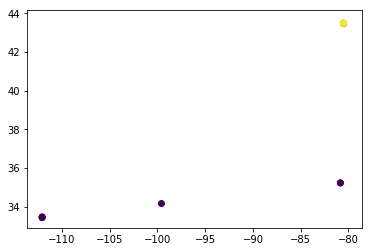

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


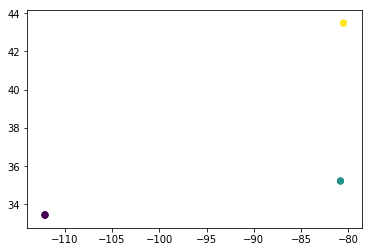

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


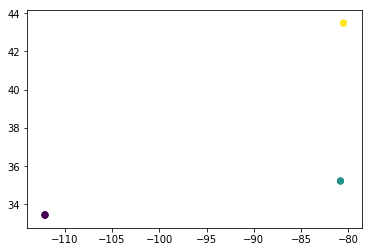

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


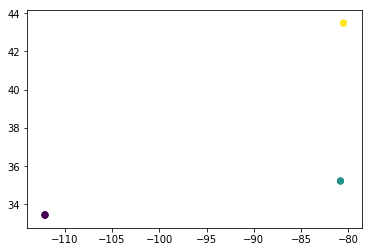

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


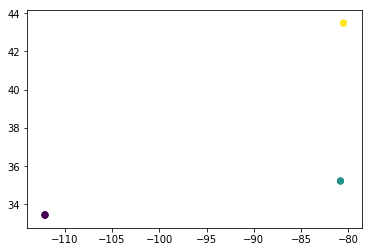

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


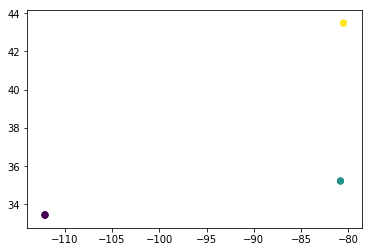

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


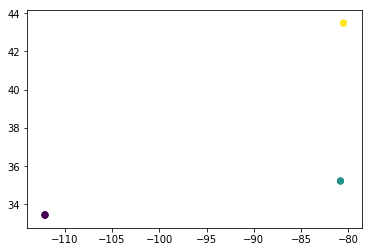

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


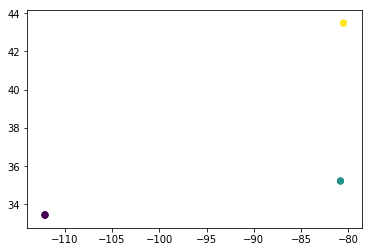

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


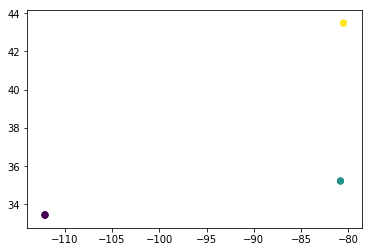

                0          1
label                       
0     -112.074131  33.449504
1      -80.843065  35.226440
2      -80.526166  43.481487


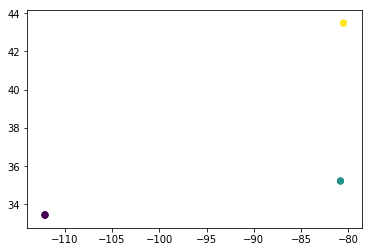

In [160]:
result,_= kmeans(test, 3)

## Save

In [157]:
with open('clusters.txt', 'w') as file:
    for i in np.arange(result.shape[0]):
        file.write(str(i)+' '+ str(int(result.loc[i].label) )+"\n")